# HousePriceData
## Term 2

### Notebook by Yogesh Chandra Ramakrishna
#### Supported by [Levi Nigam](https://www.insaid.co/)

#### Source of the Data : INSAID

<a id=Index><a/>

## Table of Contents

1. [Introduction](#Introduction)
2. [Required libraries](#Required-libraries)
3. [Problem Statement](#section3)
4. [Data Loading and Description](#section4)
5. [Data Profiling](#section5)
    - 5.1 [Understanding the Dataset](#section501)
    - 5.2 [Pre Profiling](#section502)
    - 5.3 [Processing](#section503)
     - 5.3.1 [Correlation among each Data variables](#section5031)
     - 5.3.2 [Data Imputation](#section5032)
     - 5.3.3 [Dealing with Outlier Data](#section5033)
    - 5.4 [Post Profiling](#section504)
6. [Questions](#section6)
    - 6.1 [Grouping all the movies with respect to Year of release](#section601)<br/>
    - 6.2 [Which year highest Revenue was generated ?](#section602)<br/>
    - 6.3 [Which Genre's are listed the most ?](#section603)<br/>
    - 6.4 [Which Genre movie has generated the highest Revenue?](#section604)<br/>
    - 6.5 [How are  'Rank' , 'Votes', 'Metascore' affecting the 'Ratings' of the movie ?](#section605)<br/>
    - 6.6 [How strongly is ‘Rank’, ‘Votes’,  'Metascore' variables correlated with Rating ?](#section606)<br/>
    - 6.7 [Establish coorelation between all the features using heatmap.](#section607)<br/>
    - 6.8 [Which Genre has got maximum Rating ?](#section608)<br/>
    - 6.9 [Analysing based on the column "CategoryOnRating"](#section609)<br/>
    - 6.10[Analysing Rating with Runtime (Minutes).](#section610)<br/>
    - 6.11[Finding out which director has maximum number of appearence in the list.](#section611)<br/>
    - 6.12[finding out which directors movie has the highest box office collection?](#section612)<br/>
    - 6.13[Lets joine both 6.11 and 6.12 to see who is the best Director ?](#section612)<br/>
7. [Conclusion:](#section7)<br/>

<a id=Introduction><a/>

## 1. Introduction

The notebooks explores the basic use of __Numpy__,__Pandas__, __Seaborn__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

And also we will be using __scikit learn__ and various __Machine Learning__ models, to build a predictive model, I will be doing some Statistical analysys to make this Model as accurate as possible.


* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes
    
    
* __Statistical Overview__ <br/>
Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the tests and see how we are doing with our predictions.


* __Machine Learning Modeling__ <br/>
The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

#### [Back to Index](#Index)

<a id=Required-libraries><a/>

## 2. Required libraries

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **cufflinks**: interactive graphs
* **Scikit-learn**: is a machine learning library for the Python programming language. (Note: Will import after the Algorithm is decided)

In [7]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import cufflinks as cf
cf.go_offline()

from IPython.core.display import Image, display

#### [Back to Index](#Index)

<a id=section3><a/>

## 3. Problem Statement

I have a client who needs a dashboard to their clients to know the housing prices. It’s a Real Estate Firm and they need good accuracy in the Dashboard to be the best in the market. Let’s see how we can help our client and their Clients with the data available.

#### [Back to Index](#Index)

<a id=section4><a/>

## 4. Data Loading and Description

- data set of 1,460 observations of the House prices. 
- The dataset comprises of __1460 observations of 81 columns__. Below is a table showing names of all the columns and their       description.


| Column Name      | Description                                                                                               |
| :-------------   | :-------------                                                                                            | 
|__SalePrice:__    | The property's sale price in dollars. This is the target variable that you're trying to predict.          
|__MSSubClass:__   | The building class                                                                                        
|__MSZoning__:     | The general zoning classification                                                                         
|__LotFrontage__:  | Linear feet of street connected to property
|__LotArea__:      | Lot size in square feet
|__Street__:       | Type of road access
|__Alley__:        | Type of alley access
|__LotShape__:     | General shape of property
|__LandContour__:  | Flatness of the property
|__Utilities__:    | Type of utilities available
|__LotConfig__:    | Lot configuration
|__LandSlope__:    | Slope of property
|__Neighborhood__: | Physical locations within Ames city limits
|__Condition1__:   | Proximity to main road or railroad
|__Condition2__:   | Proximity to main road or railroad (if a second is present)
|__BldgType:__     | Type of dwelling
|__HouseStyle:__   | Style of dwelling
|__OverallQual:__  | Overall material and finish quality
|__OverallCond:__  | Overall condition rating
|__YearBuilt:__    | Original construction date
|__YearRemodAdd:__ | Remodel date
|__RoofStyle:__    | Type of roof
|__RoofMatl:__     | Roof material
|__Exterior1st:__  | Exterior covering on house
|__Exterior2nd:__  | Exterior covering on house (if more than one material)
|__MasVnrType:__   | Masonry veneer type
|__MasVnrArea:__   | Masonry veneer area in square feet
|__ExterQual:__    | Exterior material quality
|__ExterCond:__    | Present condition of the material on the exterior
|__Foundation:__   | Type of foundation
|__BsmtQual:__     | Height of the basement
|__BsmtCond:__     | General condition of the basement
|__BsmtExposure:__ | Walkout or garden level basement walls
|__BsmtFinType1:__ | Quality of basement finished area
|__BsmtFinSF1:__   | Type 1 finished square feet
|__BsmtFinType2:__ | Quality of second finished area (if present)
|__BsmtFinSF2:__   | Type 2 finished square feet
|__BsmtUnfSF:__    | Unfinished square feet of basement area
|__TotalBsmtSF:__  | Total square feet of basement area
|__Heating:__      | Type of heating
|__HeatingQC:__    | Heating quality and condition
|__CentralAir:__   | Central air conditioning
|__Electrical:__   | Electrical system
|__1stFlrSF:__     | First Floor square feet
|__2ndFlrSF:__     | Second floor square feet
|__LowQualFinSF:__ | Low quality finished square feet (all floors)
|__GrLivArea:__    | Above grade (ground) living area square feet
|__BsmtFullBath:__ | Basement full bathrooms
|__BsmtHalfBath:__ | Basement half bathrooms
|__FullBath:__     | Full bathrooms above grade
|__HalfBath:__     | Half baths above grade
|__Bedroom:__      | Number of bedrooms above basement level
|__Kitchen:__      | Number of kitchens
|__KitchenQual:__  | Kitchen quality
|__TotRmsAbvGrd:__ | Total rooms above grade (does not include bathrooms)
|__Functional:__   | Home functionality rating
|__Fireplaces:__   | Number of fireplaces
|__FireplaceQu:__  | Fireplace quality
|__GarageType:__   | Garage location
|__GarageYrBlt:__  | Year garage was built
|__GarageFinish:__ | Interior finish of the garage
|__GarageCars:__   | Size of garage in car capacity
|__GarageArea:__   | Size of garage in square feet
|__GarageQual:__   | Garage quality
|__GarageCond:__   | Garage condition
|__PavedDrive:__   | Paved driveway
|__WoodDeckSF:__   | Wood deck area in square feet
|__OpenPorchSF:__  | Open porch area in square feet
|__EnclosedPorch:__| Enclosed porch area in square feet
|__3SsnPorch:__    | Three season porch area in square feet
|__ScreenPorch:__  | Screen porch area in square feet
|__PoolArea:__     | Pool area in square feet
|__PoolQC:__       | Pool quality
|__Fence:__        | Fence quality
|__MiscFeature:__  | Miscellaneous feature not covered in other categories
|__MiscVal:__      | $Value of miscellaneous feature
|__MoSold:__       | Month Sold
|__YrSold:__       | Year Sold
|__SaleType:__     | Type of sale
|__SaleCondition:__| Condition of sale

In [185]:
house = pd.read_csv('../RawData/house_data.csv')

#### [Back to Index](#Index)

<a id=section5><a/>

## 5. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section501><a/>

### 5.1 Understanding the Dataset

In [161]:
house.shape

(1460, 81)

In [158]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [159]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [160]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [161]:
house.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

__Observation:__
- We can see that we have 38 columns with continues data and 43 columns of Categorical data.


In [162]:
house.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

__Descriptive statistics using Pandas__

In [3]:
house.describe(include=np.object).transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [4]:
house.describe(include=np.number).transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### [Back to Index](#Index)

<a id=section502><a/>

### 5.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contains all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [165]:
profile = pandas_profiling.ProfileReport(house)
profile.to_file(outputfile="HousesData_Pre_Profiling.html")

In [166]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/Profiling_Summary.png", width=980, unconfined=True))

__Observation__

- from Preprofiling we can get a clear picture of the data, refer __"HousesData_Pre_Profiling.html"__ for more clarity.
- from the above summary image we can see that there are lot of missing datas and lot of Zeros which has to be taken care.
- we will go one by one and see what can be done with the missing data and Zeros in our data in next section.

#### [Back to Index](#Index)

<a id=section503><a/>

### 5.3 Processing

- Lets have some clear count on how many data’s are missing in __Numerical columns__ and __Categorical columns__ separately

In [167]:
house.columns[house.dtypes!=object]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [168]:
mynonObjlist = []
mynonObjlist = house.columns[house.dtypes!=object]

for each in mynonObjlist:
    if house[each].dtypes == np.object:
        print('Its an Object')
    elif house[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, house[each].isnull().sum()))

LotFrontage ------ : 259
MasVnrArea ------ : 8
GarageYrBlt ------ : 81


__Observation__

- We can see that, three columns out of 38 columns (int and float datatype) are having Null values.
- __LotFrontage, MasVnrArea and GarageYrBlt__ are the columns with null values but __LotFrontage__ more null values compared to   other columns.

In [169]:
house.columns[house.dtypes==object]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [170]:
myObjlist = []
myObjlist = house.columns[house.dtypes==object]

for each in myObjlist:
    if house[each].dtypes == np.object:
        if house[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, house[each].isnull().sum()))
    else:
        print('Not and Obj')

Alley ------ : 1369
MasVnrType ------ : 8
BsmtQual ------ : 37
BsmtCond ------ : 37
BsmtExposure ------ : 38
BsmtFinType1 ------ : 37
BsmtFinType2 ------ : 38
Electrical ------ : 1
FireplaceQu ------ : 690
GarageType ------ : 81
GarageFinish ------ : 81
GarageQual ------ : 81
GarageCond ------ : 81
PoolQC ------ : 1453
Fence ------ : 1179
MiscFeature ------ : 1406


__Observation__

- We can see that, 16 columns out of 43 columns (Object datatype) are having Null values.
- __Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, __ 
  __GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature__ are the columns with null values but __Alley,__           
  __FireplaceQu, PoolQC, Fence, MiscFeature__ more null values compared to other columns.

In [5]:
## Missig Data heatmap

sns.heatmap(house.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

#### [Back to Index](#Index)

<a id=section5031><a/>

### 5.3.1 Correlation among each Data variables

In [7]:
corr=house.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

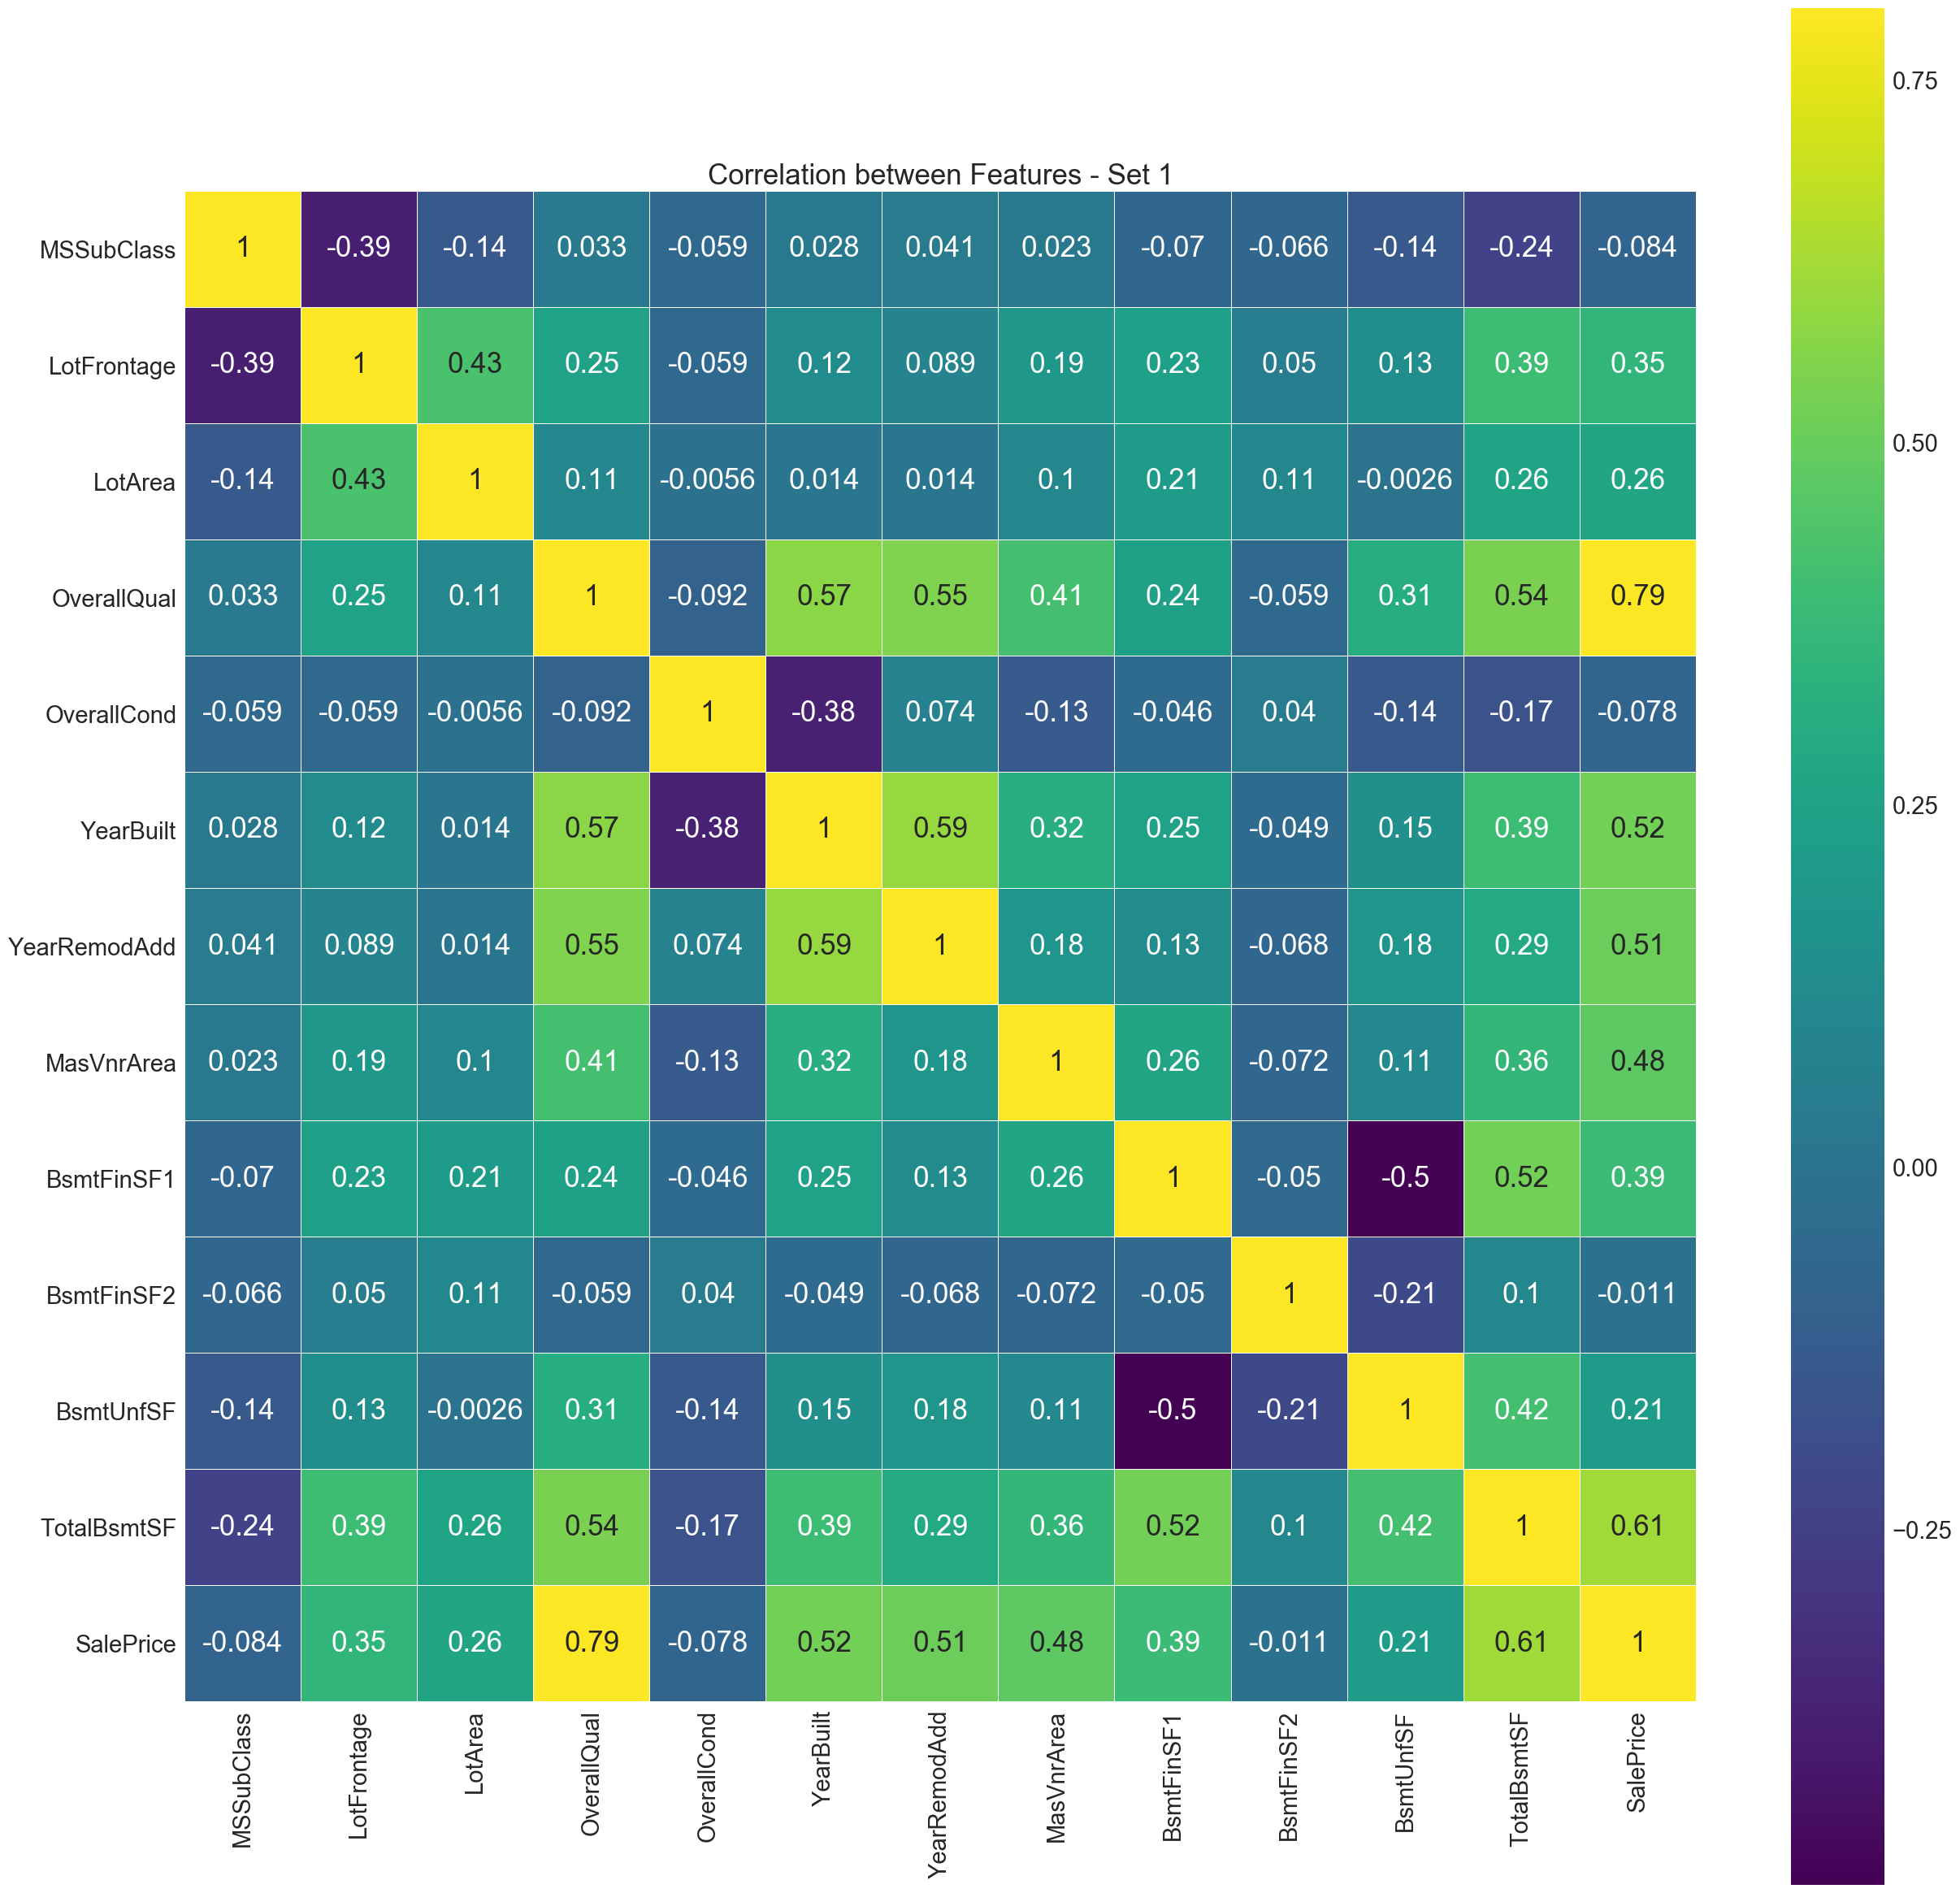

In [195]:
corrMatrix=house[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']].corr()

sns.set(font_scale=2.10)
plt.figure(figsize=(30, 30))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between Features - Set 1');

#### Observation

- With respect to Sale Price there are many Correlation, let look at the Variable with correlation more than 0.5.
- From the above plot we can see __'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', OverallQual__ are having positive     correlation, __MasVnrArea__ have 0.48 correlation but let us consider as of now and see what we can do with it later.
- There are Negetive Correlation also but since there very close to Zero lets not consider them.

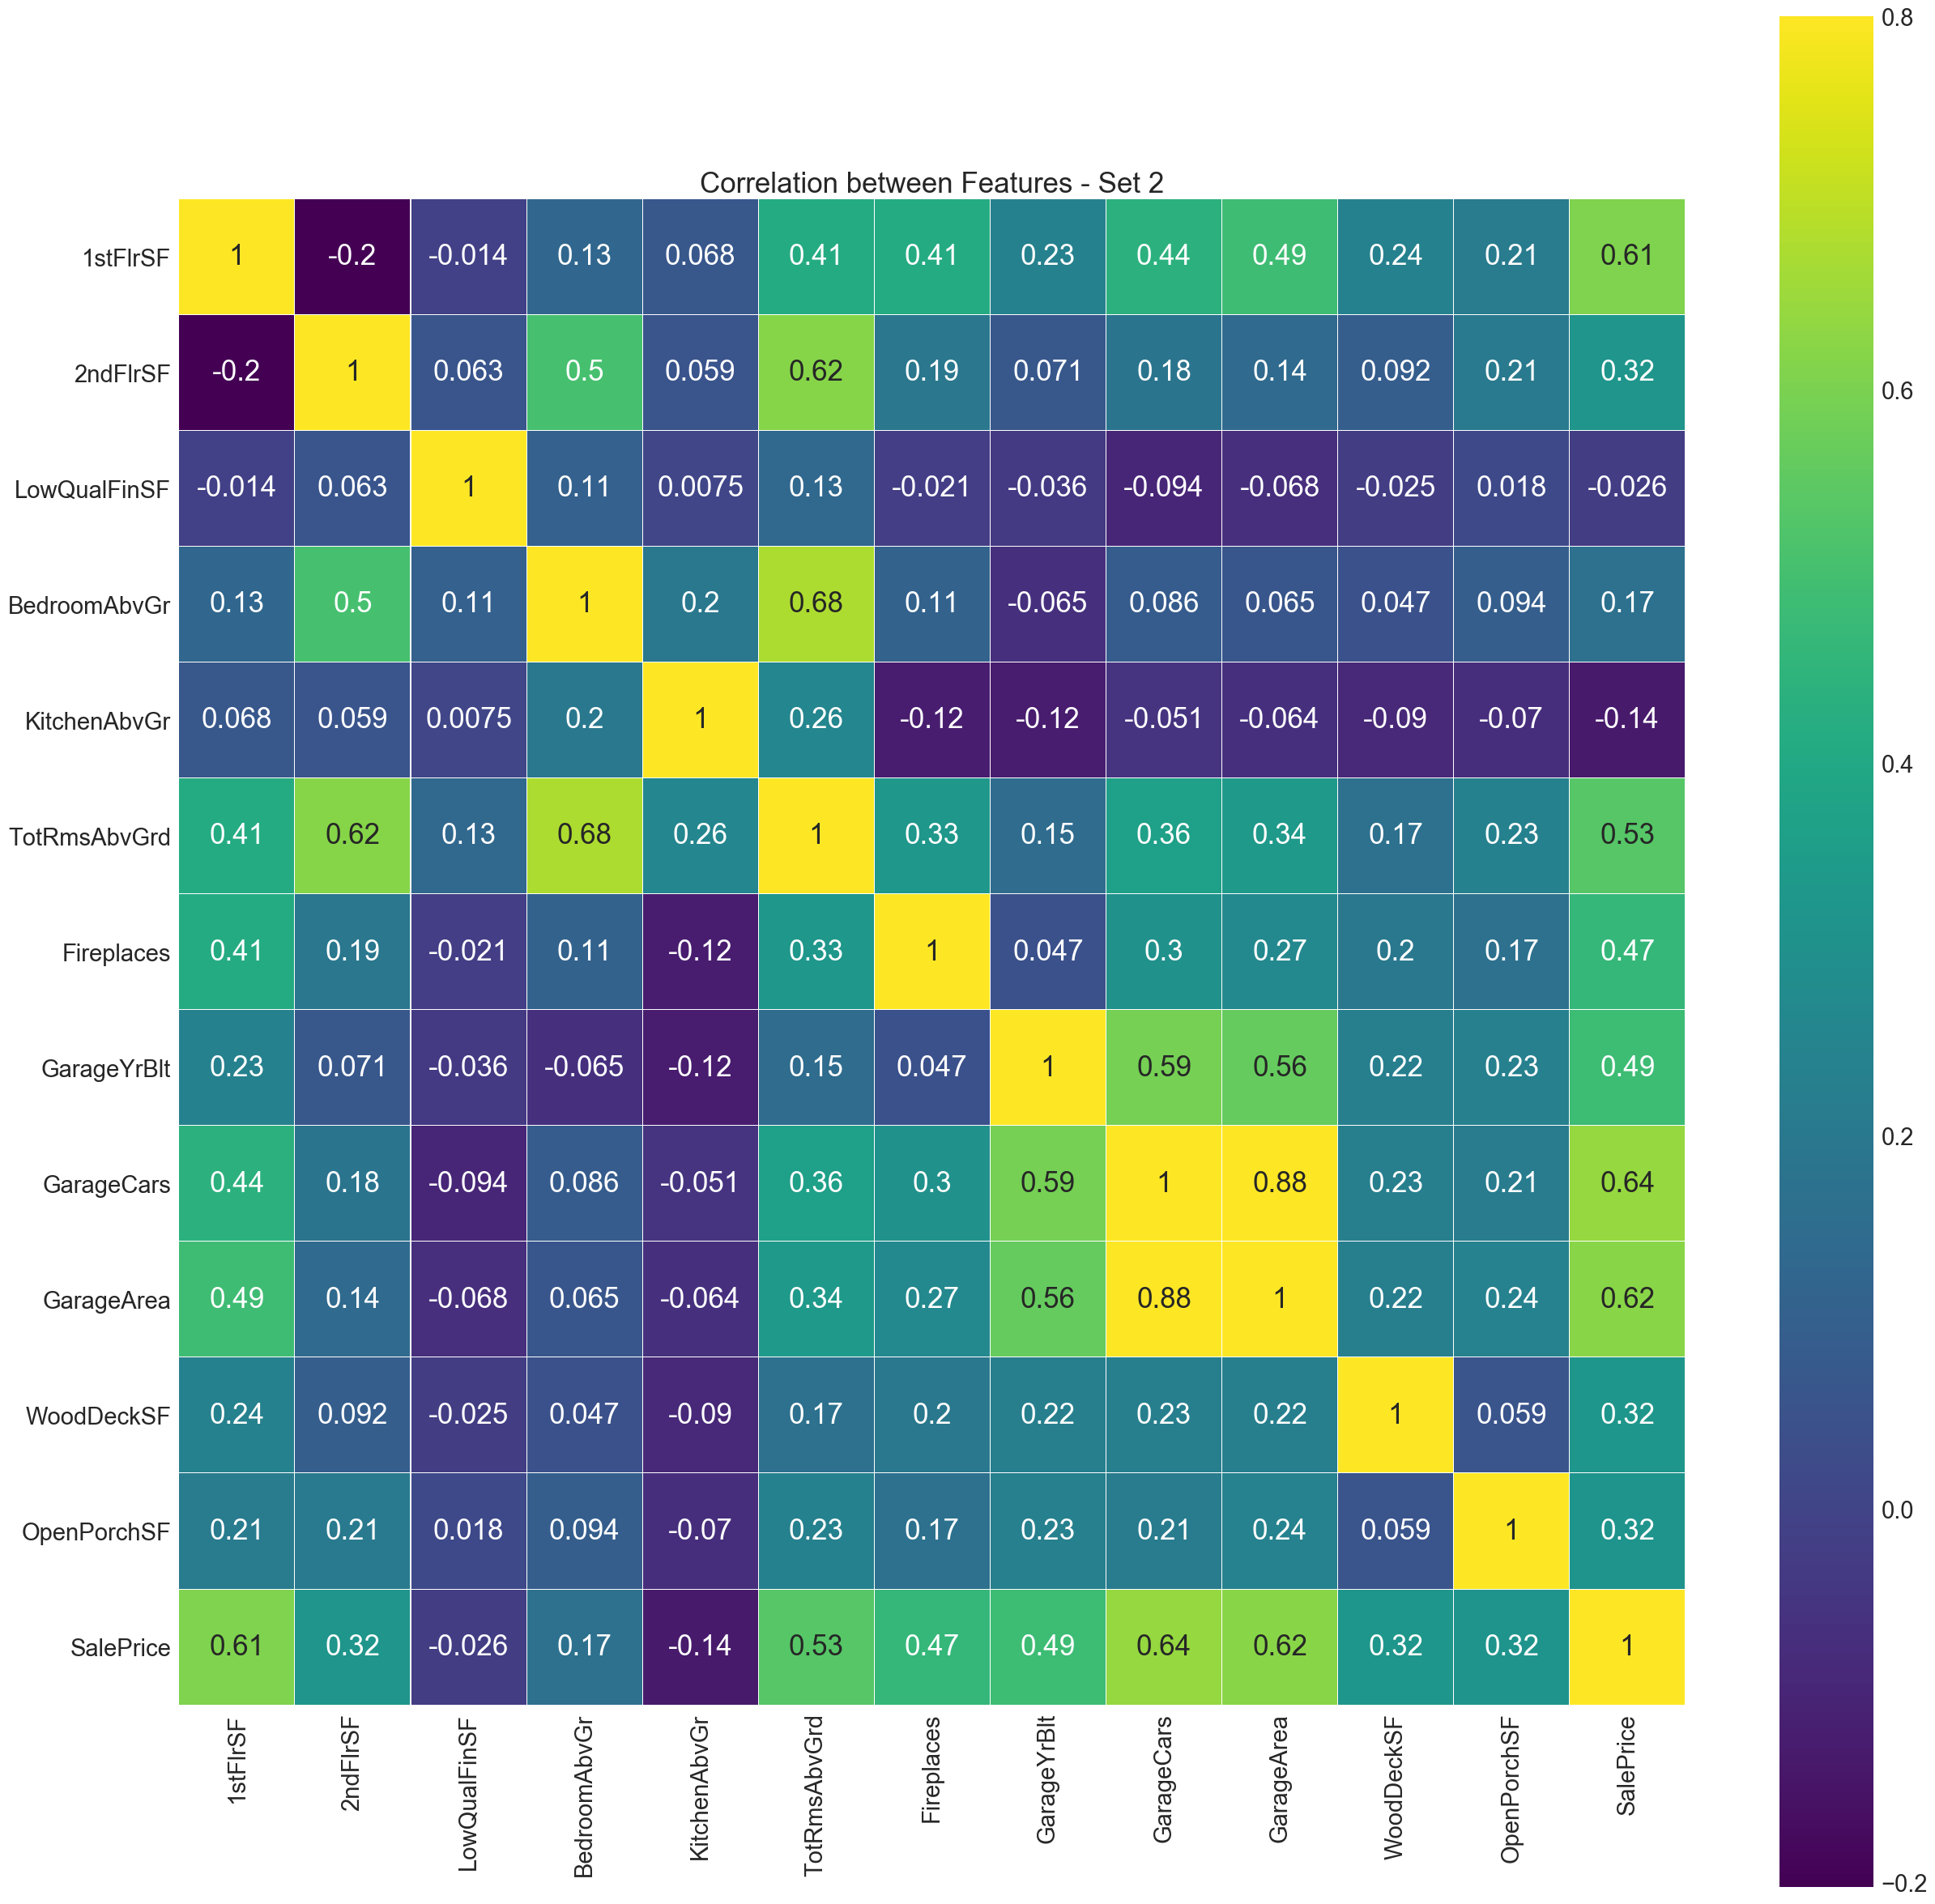

In [194]:
corrMatrix=house[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                  'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']].corr()

sns.set(font_scale=2.10)
plt.figure(figsize=(30, 30))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between Features - Set 2');

#### Observation

- With respect to Sale Price there are many Correlation, let look at the Variable with correlation more than 0.5 and closer.
- From the above plot we can see __'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', '1stFlrSF'__ are       having positive correlation.
- __'KitchenAbvGr'__ has some Negetive Correlation.

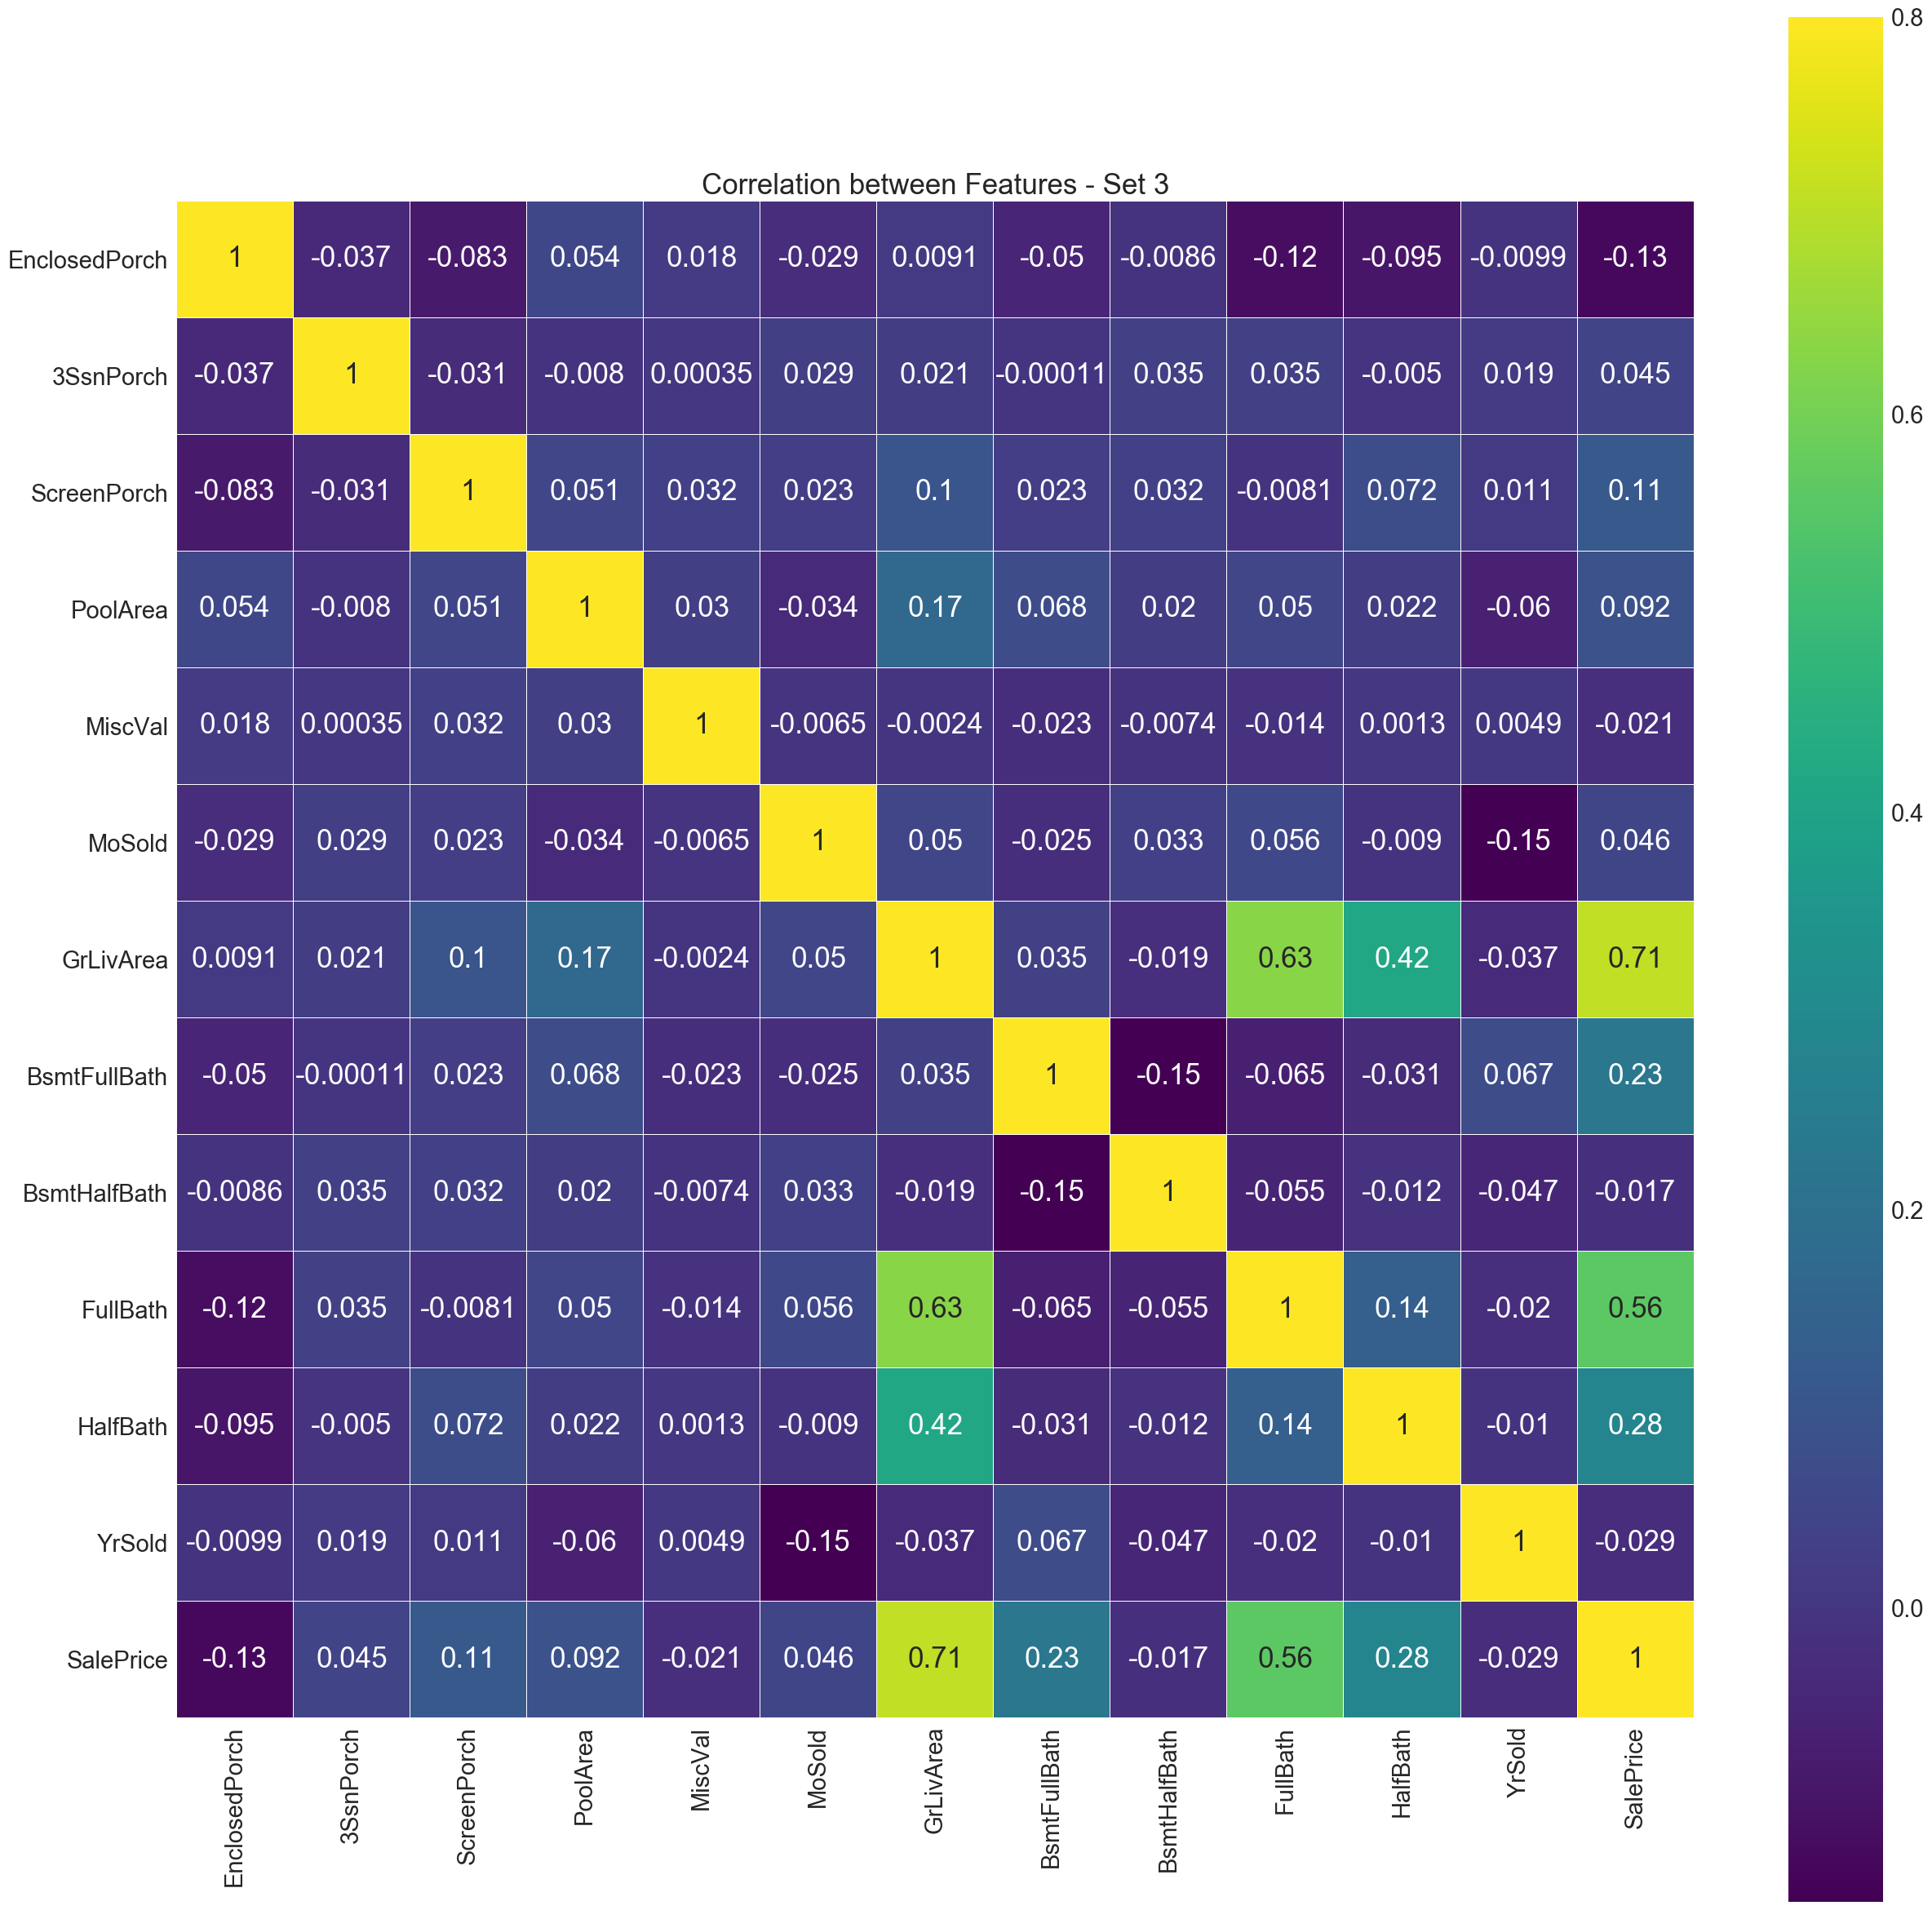

In [196]:
corrMatrix=house[['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath', 'HalfBath', 'YrSold' , 'SalePrice']].corr()

sns.set(font_scale=2.10)
plt.figure(figsize=(30, 30))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between Features - Set 3');

#### Observation

- With respect to Sale Price there are many Correlation, let look at the Variable with correlation more than 0.5 and closer.
- From the above plot we can see __'GrLivArea', 'FullBath'__ are having positive correlation.
- __'EnclosedPorch'__ has some Negetive Correlation.

##### Multicollinearity

In [8]:
correlations = house.corr()# taking correlation into variable
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
21      (GarageArea, GarageCars)     0.882475
3       (GarageYrBlt, YearBuilt)     0.825667
15     (GrLivArea, TotRmsAbvGrd)     0.825489
23       (1stFlrSF, TotalBsmtSF)     0.819530
22         (2ndFlrSF, GrLivArea)     0.687501
6   (BedroomAbvGr, TotRmsAbvGrd)     0.676620
4     (BsmtFinSF1, BsmtFullBath)     0.649212
25   (GarageYrBlt, YearRemodAdd)     0.642277
2          (FullBath, GrLivArea)     0.630012
11      (2ndFlrSF, TotRmsAbvGrd)     0.616423
18          (2ndFlrSF, HalfBath)     0.609707
26     (GarageCars, OverallQual)     0.600671
24      (GrLivArea, OverallQual)     0.593007
0      (YearBuilt, YearRemodAdd)     0.592855
12     (GarageCars, GarageYrBlt)     0.588920
17      (OverallQual, YearBuilt)     0.572323
7          (1stFlrSF, GrLivArea)     0.566024
9      (GarageArea, GarageYrBlt)     0.564567
14     (GarageArea, OverallQual)     0.562022
20      (FullBath, TotRmsAbvGrd)     0.554784
19   (OverallQual, YearRemodAdd)     0.550684
8        (FullBath, OverallQual)     0.550600
1     (GarageYrBlt, OverallQual)     0.547766
13       (GarageCars, YearBuilt)     0.537850
27    (OverallQual, TotalBsmtSF)     0.537808
10     (BsmtFinSF1, TotalBsmtSF)     0.522396
16     (BedroomAbvGr, GrLivArea)     0.521270
5       (2ndFlrSF, BedroomAbvGr)     0.502901

#### Observation

Above result shows __multicollinearity__. In regression, __"multicollinearity"__ refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

Problem:

__Multicollinearity__ increases the standard errors of the coefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant.

To avoid this we can do below things:

- Completely remove those variables
- Make new feature by adding them or by some other operation.

#### [Back to Index](#Index)

<a id=section5032><a/>

### 5.3.2 Data Imputation

As you already know for the missing values of the numeric variables:

- If the variable is continuous and there are outliers then we generally impute missing values with Median.
- If the variable is continuous and there are no or less outliers then we generally impute missing values with Mean.
- If the variable is categorical the we go for Mode or the most repeated value.
- Since we will be handling outliers in coming sections we will go with Mean.
- We should be care full with data replacement if the house has no certain features better we replace it with None

### LotFrontage

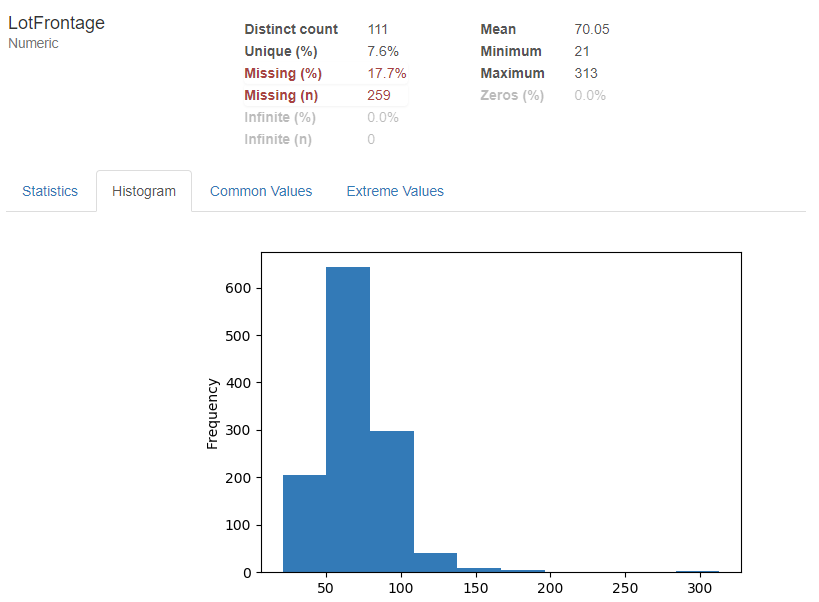

In [11]:
display(Image(filename = "../Images/LotFrontage_Histogram.png", width=600, unconfined=True))

In [186]:
LotMean = house['LotFrontage'].mean()
house['LotFrontage'].fillna(LotMean, inplace = True)

- Lot frontage had 259 missing data which are replaced by Mean.

In [187]:
house.LotFrontage.isnull().sum()

0

In [188]:
house.hist(column='LotFrontage', by=None, grid=True, figsize=None, bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011936BE6668>]],
      dtype=object)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



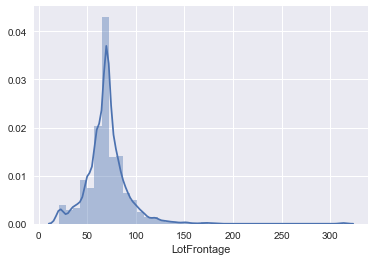

In [189]:
sns.distplot(house['LotFrontage'], bins=40)

- Since the above image shows that there are 259 observation missing, we will replace all the missing data with Mean values.
- After the outliers are taken care it will give normal distribution.

### MasVnrArea

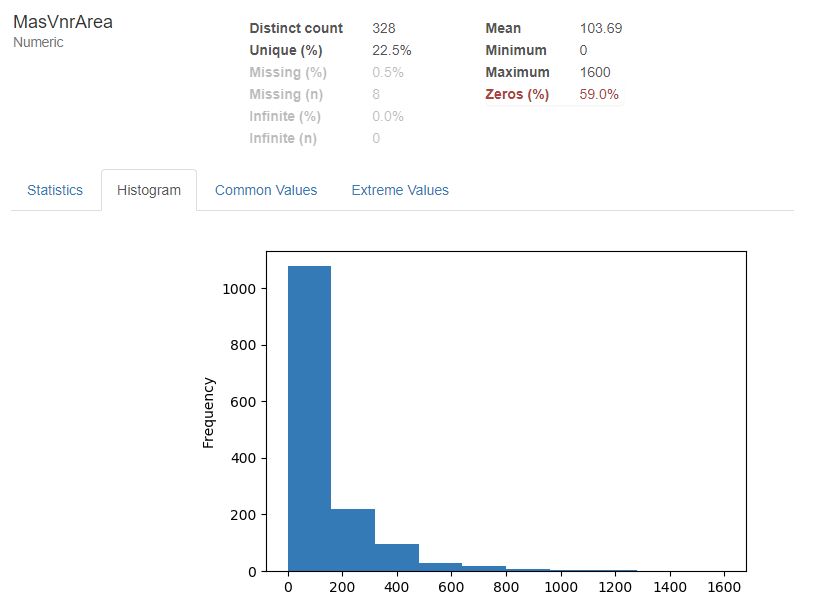

In [16]:
display(Image(filename = "../Images/MasVnrArea_Histogram.png", width=600, unconfined=True))

- Since the above image shows that there are 8 observation missing and in Histogram we can see that there are lot of outliers in 
  the data (zeros 59.0%).

In [190]:
house['MasVnrArea'][house['MasVnrType'].isnull()==True]

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

- MasVnrArea and MasVnrType are related , this data tells us that tere is no Masonry veneer area in square feet, we can replace   this None.

In [191]:
house["MasVnrType"] = house["MasVnrType"].fillna('None')
house["MasVnrArea"] = house["MasVnrArea"].fillna(0.0)

- If you see MasVnrType 59.2% is marker None and in which 0.2% is missing Data.
- MasVnrArea has 59.0% of Zero values, since MasVnrType 59.2% is marked None. This will be handeled when we take care of      
  outliers.

### 'GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea'

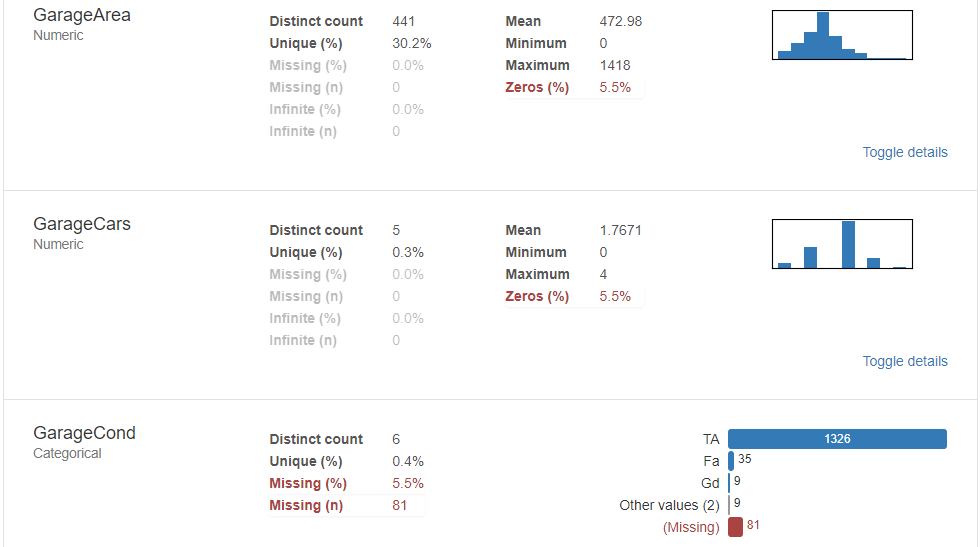

In [53]:
display(Image(filename = "../Images/Garage1.png", width=600, unconfined=True))

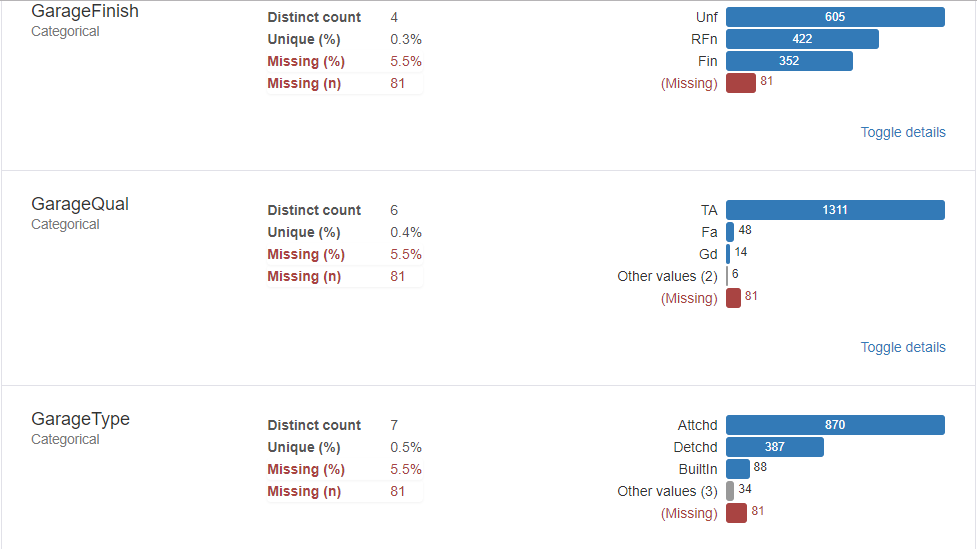

In [54]:
display(Image(filename = "../Images/Garage2.png", width=600, unconfined=True))

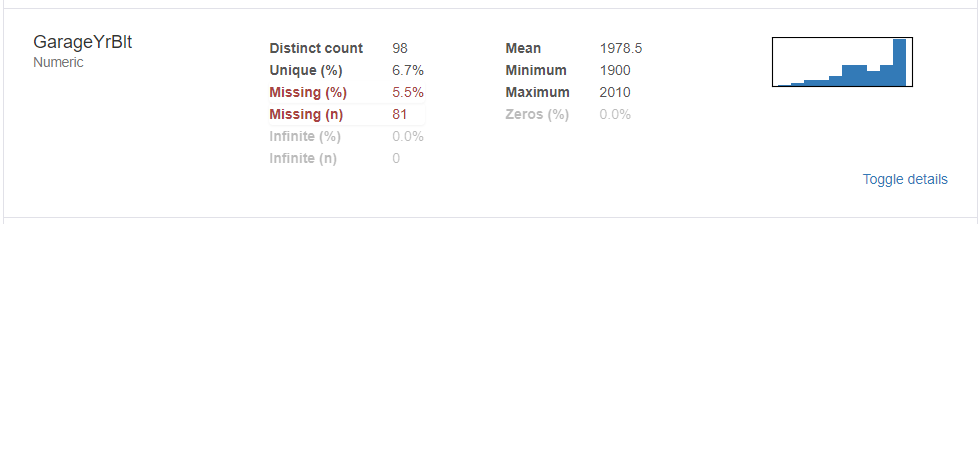

In [55]:
display(Image(filename = "../Images/Garage3.png", width=600, unconfined=True))

In [192]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
house[garage_cols][house['GarageType'].isnull()==True]

GarageType GarageQual GarageCond  GarageYrBlt GarageFinish  GarageCars  \
39          NaN        NaN        NaN          NaN          NaN           0   
48          NaN        NaN        NaN          NaN          NaN           0   
78          NaN        NaN        NaN          NaN          NaN           0   
88          NaN        NaN        NaN          NaN          NaN           0   
89          NaN        NaN        NaN          NaN          NaN           0   
99          NaN        NaN        NaN          NaN          NaN           0   
108         NaN        NaN        NaN          NaN          NaN           0   
125         NaN        NaN        NaN          NaN          NaN           0   
127         NaN        NaN        NaN          NaN          NaN           0   
140         NaN        NaN        NaN          NaN          NaN           0   
148         NaN        NaN        NaN          NaN          NaN           0   
155         NaN        NaN        NaN          NaN          NaN           0   
163         NaN        NaN        NaN          NaN          NaN           0   
165         NaN        NaN        NaN          NaN          NaN           0   
198         NaN        NaN        NaN          NaN          NaN           0   
210         NaN        NaN        NaN          NaN          NaN           0   
241         NaN        NaN        NaN          NaN          NaN           0   
250         NaN        NaN        NaN          NaN          NaN           0   
287         NaN        NaN        NaN          NaN          NaN           0   
291         NaN        NaN        NaN          NaN          NaN           0   
307         NaN        NaN        NaN          NaN          NaN           0   
375         NaN        NaN        NaN          NaN          NaN           0   
386         NaN        NaN        NaN          NaN          NaN           0   
393         NaN        NaN        NaN          NaN          NaN           0   
431         NaN        NaN        NaN          NaN          NaN           0   
434         NaN        NaN        NaN          NaN          NaN           0   
441         NaN        NaN        NaN          NaN          NaN           0   
464         NaN        NaN        NaN          NaN          NaN           0   
495         NaN        NaN        NaN          NaN          NaN           0   
520         NaN        NaN        NaN          NaN          NaN           0   
...         ...        ...        ...          ...          ...         ...   
954         NaN        NaN        NaN          NaN          NaN           0   
960         NaN        NaN        NaN          NaN          NaN           0   
968         NaN        NaN        NaN          NaN          NaN           0   
970         NaN        NaN        NaN          NaN          NaN           0   
976         NaN        NaN        NaN          NaN          NaN           0   
1009        NaN        NaN        NaN          NaN          NaN           0   
1011        NaN        NaN        NaN          NaN          NaN           0   
1030        NaN        NaN        NaN          NaN          NaN           0   
1038        NaN        NaN        NaN          NaN          NaN           0   
1096        NaN        NaN        NaN          NaN          NaN           0   
1123        NaN        NaN        NaN          NaN          NaN           0   
1131        NaN        NaN        NaN          NaN          NaN           0   
1137        NaN        NaN        NaN          NaN          NaN           0   
1143        NaN        NaN        NaN          NaN          NaN           0   
1173        NaN        NaN        NaN          NaN          NaN           0   
1179        NaN        NaN        NaN          NaN          NaN           0   
1218        NaN        NaN        NaN          NaN          NaN           0   
1219        NaN        NaN        NaN          NaN          NaN           0   
1234        NaN        NaN        NaN          NaN     

#### Observation

- We can see that __'GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea'__ all these     columns have data missing in the same row. so will replace these data with None and 0.
- Zeros may lead to outliers we will take care of out liers in the later section.

In [193]:
for col in garage_cols:
    if house[col].dtype==np.object:
        house[col] = house[col].fillna('None')
    else:
        house[col] = house[col].fillna(0)

In [194]:
house[garage_cols][house['GarageType'].isnull()==True]

Empty DataFrame
Columns: [GarageType, GarageQual, GarageCond, GarageYrBlt, GarageFinish, GarageCars, GarageArea]
Index: []

### 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2'

In [172]:
display(Image(filename = "../Images/Bsmt1.png", width=600, unconfined=True))

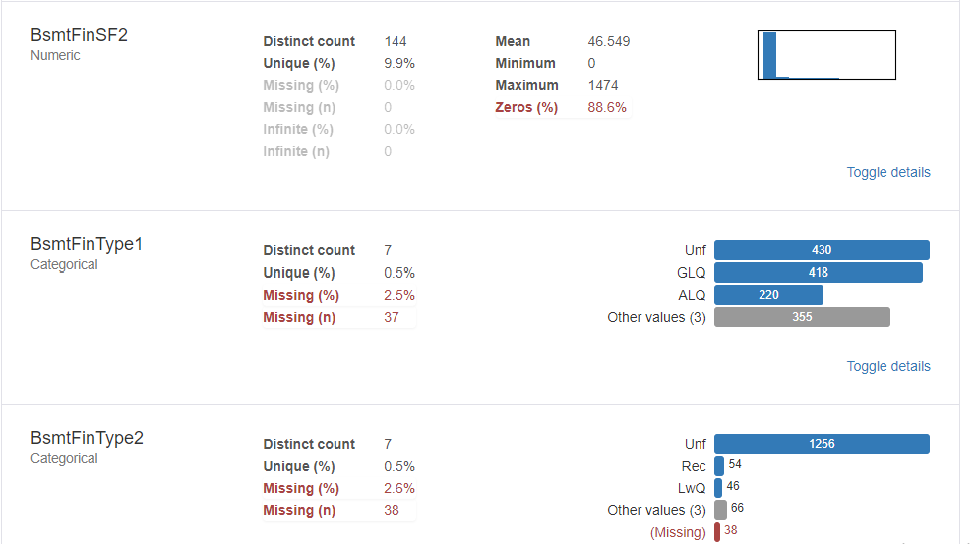

In [173]:
display(Image(filename = "../Images/Bsmt2.png", width=600, unconfined=True))

In [63]:
display(Image(filename = "../Images/Bsmt3.png", width=600, unconfined=True))

In [195]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
house[basement_cols][house['BsmtQual'].isnull()==True]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN           0   
39        NaN      NaN          NaN          NaN          NaN           0   
90        NaN      NaN          NaN          NaN          NaN           0   
102       NaN      NaN          NaN          NaN          NaN           0   
156       NaN      NaN          NaN          NaN          NaN           0   
182       NaN      NaN          NaN          NaN          NaN           0   
259       NaN      NaN          NaN          NaN          NaN           0   
342       NaN      NaN          NaN          NaN          NaN           0   
362       NaN      NaN          NaN          NaN          NaN           0   
371       NaN      NaN          NaN          NaN          NaN           0   
392       NaN      NaN          NaN          NaN          NaN           0   
520       NaN      NaN          NaN          NaN          NaN           0   
532       NaN      NaN          NaN          NaN          NaN           0   
533       NaN      NaN          NaN          NaN          NaN           0   
553       NaN      NaN          NaN          NaN          NaN           0   
646       NaN      NaN          NaN          NaN          NaN           0   
705       NaN      NaN          NaN          NaN          NaN           0   
736       NaN      NaN          NaN          NaN          NaN           0   
749       NaN      NaN          NaN          NaN          NaN           0   
778       NaN      NaN          NaN          NaN          NaN           0   
868       NaN      NaN          NaN          NaN          NaN           0   
894       NaN      NaN          NaN          NaN          NaN           0   
897       NaN      NaN          NaN          NaN          NaN           0   
984       NaN      NaN          NaN          NaN          NaN           0   
1000      NaN      NaN          NaN          NaN          NaN           0   
1011      NaN      NaN          NaN          NaN          NaN           0   
1035      NaN      NaN          NaN          NaN          NaN           0   
1045      NaN      NaN          NaN          NaN          NaN           0   
1048      NaN      NaN          NaN          NaN          NaN           0   
1049      NaN      NaN          NaN          NaN          NaN           0   
1090      NaN      NaN          NaN          NaN          NaN           0   
1179      NaN      NaN          NaN          NaN          NaN           0   
1216      NaN      NaN          NaN          NaN          NaN           0   
1218      NaN      NaN          NaN          NaN          NaN           0   
1232      NaN      NaN          NaN          NaN          NaN           0   
1321      NaN      NaN          NaN          NaN          NaN           0   
1412      NaN      NaN          NaN          NaN          NaN           0   

      BsmtFinSF2  
17             0  
39             0  
90             0  
102            0  
156            0  
182            0  
259            0  
342            0  
362            0  
371            0  
392            0  
520            0  
532            0  
533            0  
553            0  
646            0  
705            0  
736            0  
749            0  
778            0  
868            0  
894            0  
897            0  
984            0  
1000           0  
1011           0  
1035           0  
1045           0  
1048           0  
1049           0  
1090           0  
1179           0  
1216           0  
1218           0  
1232           0  
1321           0  
1412           0

- All categorical variables contains NAN whereas continuous ones have 0. So that means there is no basement for those houses. we can replace it with 'None'.

In [196]:
for col in basement_cols:
    if 'FinSF'not in col:
        house[col] = house[col].fillna('None')

In [197]:
house[basement_cols][house['BsmtQual'].isnull()==True]

Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1, BsmtFinSF2]
Index: []

### Electrical

In [198]:
house['Electrical'].isnull().sum()

1

-  As we see there is only one data missing, we can fill that with mode , that is most frequent value in the column.

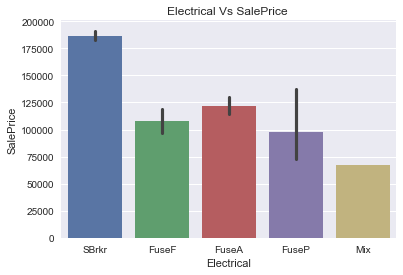

In [199]:
sns.barplot("Electrical","SalePrice",data=house)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

In [200]:
house["Electrical"] = house["Electrical"].fillna('SBrkr')

In [201]:
house['Electrical'].isnull().sum()

0

### Pool Area and Pool QC

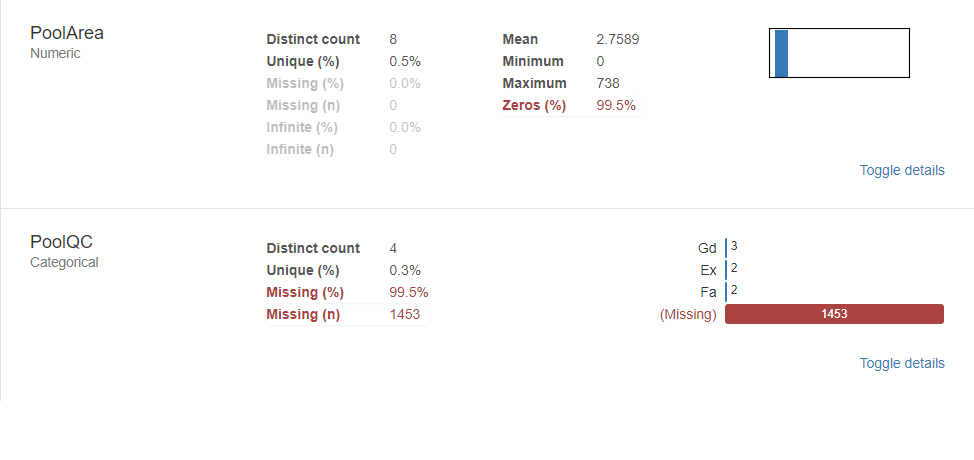

In [202]:
display(Image(filename = "../Images/Pool.png", width=600, unconfined=True))

- If we see both pool area and Pool QC both are having 99.5% missing data , that means these houses have no pool area.
- Lets see how this variable hold relation with dependent variable.

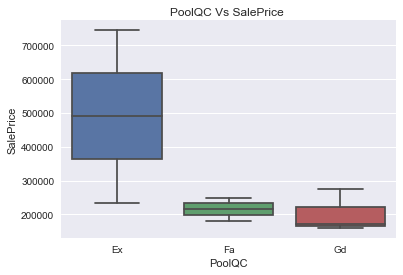

In [203]:
sns.boxplot("PoolQC","SalePrice",data=house)
plt.title("PoolQC Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("PoolQC");

- Since 99.5% of the data is missing, i think better we drop these columns

In [204]:
house.drop(['PoolQC', 'PoolArea'], axis=1, inplace= True)

### Alley

In [206]:
house['Alley'].isnull().sum()

1369

- All missing value indicate that particular house doesn't have an alley access.we can replace it with 'None'.

In [207]:
house["Alley"] = house["Alley"].fillna('None')

In [208]:
house['Alley'].isnull().sum()

0

### Fireplaces

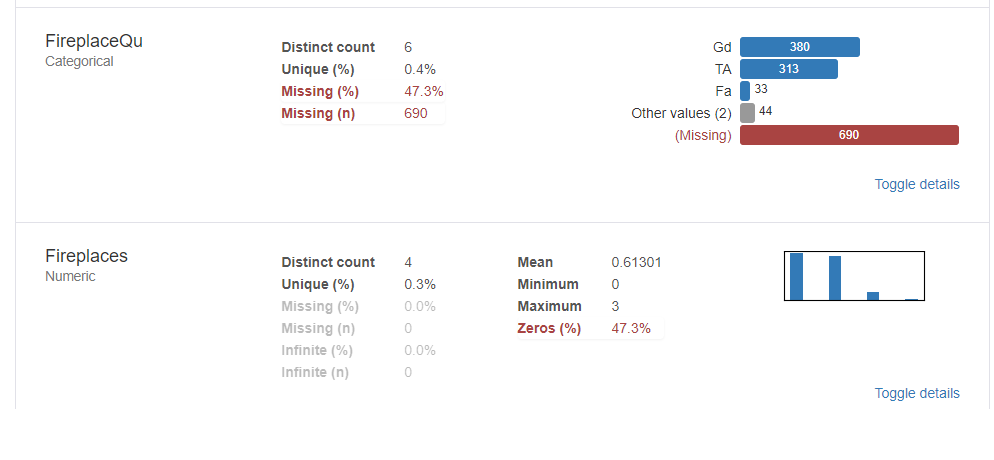

In [209]:
display(Image(filename = "../Images/FirePlace.png", width=600, unconfined=True))

In [210]:
house['FireplaceQu'].isnull().sum()

690

- All missing data indicated no Fire place in that house, we can see in the above screenshot.
- We can  replace all missing values with None

In [211]:
house["FireplaceQu"] = house["FireplaceQu"].fillna('None')

In [212]:
house['FireplaceQu'].isnull().sum()

0

### Fence

In [213]:
sns.violinplot(house["Fence"],house["SalePrice"])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");

In [214]:
house["Fence"].isnull().sum()

1179

- Lets assume that these houses have no fence and replace it with None

In [215]:
house["Fence"] = house["Fence"].fillna('None')

In [216]:
house["Fence"].isnull().sum()

0

### MiscFeature

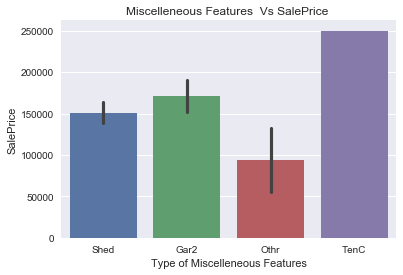

In [217]:
sns.barplot(house["MiscFeature"],house["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");

- Some houses don't have miscellaneous features like shown above , shed, gar2, TenC and Othr
-  We replace the missing values with none

In [218]:
house["MiscFeature"] = house["MiscFeature"].fillna('None')

In [219]:
house["MiscFeature"].isnull().sum()

0

- Lets see if any Null values are left in the data

In [220]:
myObjlist = []
myObjlist = house.columns[house.dtypes==object]

for each in myObjlist:
    if house[each].dtypes == np.object:
        if house[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, house[each].isnull().sum()))
    else:
        print('Not and Obj')

In [221]:
mynonObjlist = []
mynonObjlist = house.columns[house.dtypes!=object]

for each in mynonObjlist:
    if house[each].dtypes == np.object:
        print('Its an Object')
    elif house[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, house[each].isnull().sum()))

In [222]:
sns.heatmap(house.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.00)
plt.figure(figsize=(40,40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

- Its clear from the above heatmap that there are no Null values in the data
- In Next section we shall see how to handle the outlier data’s

#### [Back to Index](#Index)

<a id=section5033><a/>

### 5.3.3 Dealing with Outlier Data

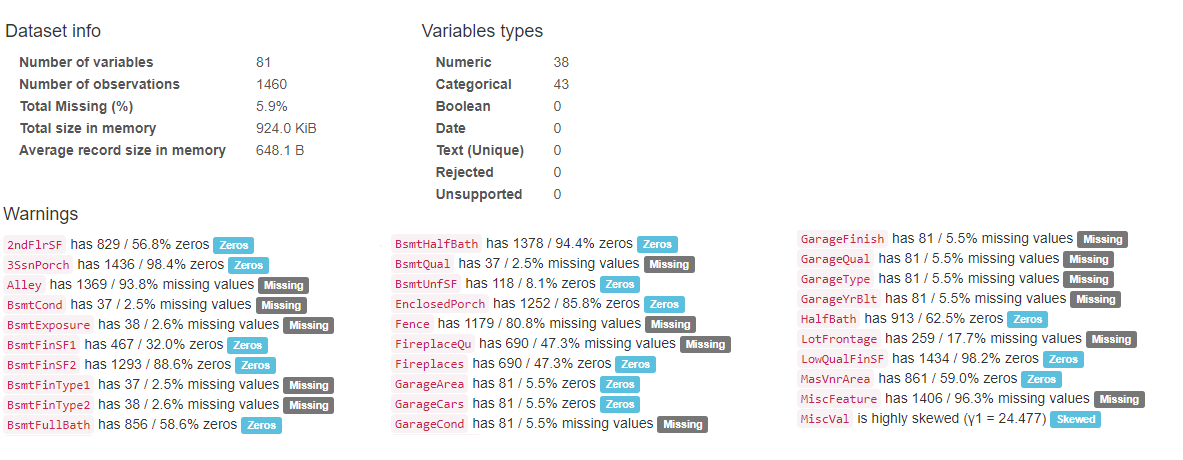

In [113]:
display(Image(filename = "../Images/Profiling_Summary.png", width=600, unconfined=True))

- __Finding Outliers and Replacing Data__

- Lets see how we can identify outliers mathematically using __IQR score__.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical  
  dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,IQR =Q3− Q1.
- a number "a" from the vector, "x" is an outlier if a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x) 
  iqr: interquantile range = third interquantile - first interquantile

In [225]:
plt.scatter(house.EnclosedPorch, house["SalePrice"].values,color='orange')
plt.title("EnclosedPorch Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("EnclosedPorch");

In [224]:
## Checking for Outlier data

def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

house.EnclosedPorch[outliers(house.EnclosedPorch)]

3       272
7       228
8       205
14      176
21      205
29       87
30      172
48      102
58       37
61      144
63       64
69      114
74      202
79      128
88      156
92       44
98       77
108     144
113     192
116     144
121     140
134     180
154     228
155     128
164     183
175      39
179     184
181      40
197     552
198      30
       ... 
1266    264
1274     81
1279    164
1284     42
1296    123
1310    162
1325    100
1326    286
1333    190
1345    168
1349     20
1360    301
1370    198
1380     96
1382    221
1383    112
1393    212
1396     50
1397    150
1398    168
1400    112
1404    160
1416    114
1419    216
1428    154
1429     99
1438    158
1439    216
1445    252
1458    112
Name: EnclosedPorch, Length: 208, dtype: int64

In [226]:
# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 

def replace(x):
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()], value = [np.percentile(x,5),np.percentile(x,95)])

house.EnclosedPorch[replace(house.EnclosedPorch)]

EnclosedPorch
0.0      0.0
0.0      0.0
0.0      0.0
272.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
228.0    0.0
205.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
176.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
205.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
87.0     0.0
        ... 
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
158.0    0.0
216.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
252.0    0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
0.0      0.0
112.0    0.0
0.0      0.0
Name: EnclosedPorch, Length: 1460, dtype: float64

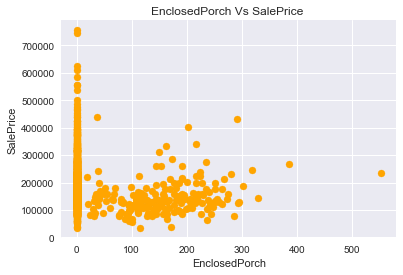

In [227]:
plt.scatter(house.EnclosedPorch, house["SalePrice"].values,color='orange')
plt.title("EnclosedPorch Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("EnclosedPorch");

__EnclosedPorch__

In [149]:
house.get_dtype_counts()

float64     4
int64      34
object     44
dtype: int64

In [155]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

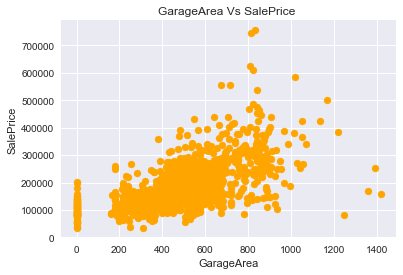

In [111]:
plt.scatter(house.GarageArea, house["SalePrice"].values,color='orange')
plt.title("GarageArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GarageArea");